In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from learnML.classification import LogisticRegression
from learnML.preprocessing import train_test_split, ZScoreNormalization

In [3]:
# Load the data
dataset = pd.read_csv("data/admissions.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 116.  ,   4.  , ...,   4.5 ,   9.45,   1.  ],
       [312.  , 103.  ,   3.  , ...,   4.  ,   8.78,   0.  ],
       [333.  , 117.  ,   4.  , ...,   4.  ,   9.66,   1.  ]])

In [5]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [6]:
y = np.where(y > 0.5, 1, 0)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [8]:
# Normalize the data
X_scalar = ZScoreNormalization(X_train)
X_scalar.fit_transform()

array([[ 0.28270144, -0.55273851, -0.09692788, ..., -1.0947599 ,
        -0.07016885,  0.88640526],
       [-0.14050431, -0.06788017, -0.95217384, ..., -0.54370626,
        -0.18484167,  0.88640526],
       [-0.47906891, -0.06788017,  0.75831809, ...,  1.10945467,
         0.63424993,  0.88640526],
       ...,
       [-2.25653307, -0.55273851,  0.75831809, ..., -1.0947599 ,
        -1.8885522 , -1.12815215],
       [ 1.8908833 ,  1.87155319,  1.61356406, ...,  0.55840102,
         1.78097817, -1.12815215],
       [ 0.45198374,  0.41697817,  0.75831809, ...,  1.66050831,
         0.84721374,  0.88640526]])

In [9]:
# Train the model
model = LogisticRegression(learning_rate=0.005, n_iterations=100000, x_scalar=X_scalar)
model.fit(X_train, y_train)

Iteration:       0 | Cost: 6.919785e-01
Iteration:   10000 | Cost: 1.696349e-01
Iteration:   20000 | Cost: 1.540572e-01
Iteration:   30000 | Cost: 1.483160e-01
Iteration:   40000 | Cost: 1.455053e-01
Iteration:   50000 | Cost: 1.439436e-01
Iteration:   60000 | Cost: 1.430099e-01
Iteration:   70000 | Cost: 1.424237e-01
Iteration:   80000 | Cost: 1.420428e-01
Iteration:   90000 | Cost: 1.417887e-01
Iteration:  100000 | Cost: 1.416159e-01


In [10]:
print("Weights:", model.get_weights())
print("Intercept:", model.get_intercept())

Weights: [ 0.19168942  0.95668094 -1.1251607  -0.72545348  0.60446452  3.10359085
 -0.13219623]
Intercept: 4.844391193166985


In [11]:
y_pred = model.predict(X_test)
np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), axis=1)

array([[1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1,

In [12]:
from learnML.utils import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(y_pred, y_test)

array([[ 4,  4],
       [ 4, 88]])

In [13]:
print("Accuracy:", accuracy_score(y_pred, y_test))
print("Precision:", precision_score(y_pred, y_test))
print("Recall:", recall_score(y_pred, y_test))

Accuracy: 0.92
Precision: 0.9565217391304348
Recall: 0.9565217391304348


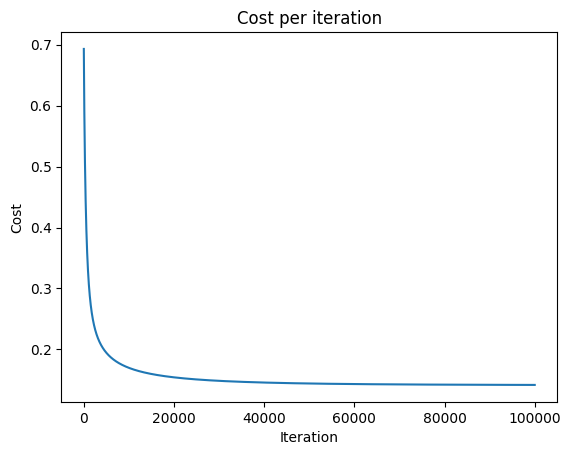

In [14]:
plt.plot(model.get_cost_history())
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost per iteration")
plt.show()